## This is used to generate tests and figures appropriated



In [ ]:

tests = TestInstance(0,10,1,10)
tests.runTests()
tests.createGraph()

## Configure your testing using
TestInstance class by init with <br>
TestInstance(parameter_choice(index), start_value, max_value, nbTests)<br>
Then execute runTests and createGraph
<p>
tests = TestInstance(0,10,1,10)
tests.runTests()
tests.createGraph()
</p>

In [181]:
from tqdm import tqdm
import subprocess
import seaborn
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
import matplotlib.pyplot as plt

#plt.style.use('seaborn')
class Parameter():
	def __init__(self,name,default_value):
		self.value  = default_value
		self.name = name
		
	def get_default_value(self):
		return self.default_value
	
	def add_endpoint(self, start, value, nbSteps):
		self.default_value = start
		self.value = self.default_value
		self.endpoint = value 
		self.nbSteps = nbSteps
	def __str__(x):
		return x.name + ": "+str(x.value) 
	def __repr__(self):
		return self.__str__()
class IntParameter(Parameter):
	def __init__(self, name, default_value):
		self.name = name 
		self.default_value = default_value
		self.endpoint = None 
		self.it = 1
		self.value = default_value
	
	def next(self):
		if(self.endpoint == None):
			return self.default_value
		else: 
			self.it+=1
			self.value = int(self.default_value - (self.default_value- self.endpoint) * self.it / self.nbSteps)
	def log(self):
		return int(self.default_value + (self.default_value- self.endpoint) * self.it / self.nbSteps)
	
class FloatParameter(Parameter):
	def __init__(self, name, default_value):
		self.name = name 
		self.default_value = default_value
		self.endpoint = None 
		self.it = 1 
		self.value = default_value
	def next(self):
		if(self.endpoint == None):
			return self.default_value
		else: 
			self.it+=1
			self.value = self.default_value + (self.default_value- self.endpoint) * self.it / self.nbSteps
	def log(self):
		return self.default_value + (self.default_value- self.endpoint) * self.it / self.nbSteps

class TestInstance():
	executable_path = "tests"
	separator =" "
	
	varying_param_log = []
	
	def __init__(self,choice, start_value, max_value, nbTests):
		self.possible_parameters = [IntParameter("nbThreads", 8), IntParameter("matrixSize", 10000), IntParameter("matrixRep",10000), FloatParameter("blockper", 0.1)]
		self.algorithms = ["ARMPL","RSB","CYTOSIM_ORIGINAL", "CYTOSIM_NEW" ,"CYTOSIM_TEST"]
		self.choice = choice
		self.max_value = max_value
		self.start_value = start_value
		self.nbTests = nbTests
		self.variating_parameter = self.possible_parameters[choice]
		self.isRun = False
		self.variating_parameter.add_endpoint(self.start_value,max_value, nbTests)#adding trajectory 

		self.results = {}
		for algo in self.algorithms:
			self.results[algo] = []
		self.results[self.variating_parameter.name] = []
	def runTests(self):
		
		for i in tqdm(range(self.nbTests)):
			self.execWith(self.possible_parameters)
			for param in self.possible_parameters:
				param.next()
			self.varying_param_log.append(self.variating_parameter.log())
		
		self.isRun = True
	def execWith(self, parameters):
		print("Running with : "+str(parameters))
		args = [str(param.value) for param in self.possible_parameters]
		command = [self.executable_path] + args
		result = subprocess.run(command, capture_output=True, text=True)
		f = open("res/compute.out")
		f.readline()#skipping first line
		res = f.readline().strip().split(self.separator)
		i = 0
		for algo in self.algorithms:
			self.results[algo].append(int(res[i]))
			i+=1
		self.results[self.variating_parameter.name].append(int(self.variating_parameter.value))
	def createGraph(self):
		if(self.isRun):
			plt.figure(dpi=500)
			for algo in self.algorithms:
				plt.plot(self.results[self.variating_parameter.name], self.results[algo],label=algo)
				plt.title("Computational time in term of "+self.variating_parameter.name)
				plt.legend()
			plt.show()
		else:
			raise Exception("Do not run createGraph before runTests")

  0%|          | 0/8 [00:00<?, ?it/s]

Running with : [nbThreads: 1, matrixSize: 10000, matrixRep: 10000, blockper: 0.1]


 12%|█▎        | 1/8 [00:22<02:36, 22.42s/it]

Running with : [nbThreads: 2, matrixSize: 10000, matrixRep: 10000, blockper: 0.1]


 25%|██▌       | 2/8 [00:48<02:25, 24.32s/it]

Running with : [nbThreads: 3, matrixSize: 10000, matrixRep: 10000, blockper: 0.1]


 38%|███▊      | 3/8 [01:09<01:55, 23.04s/it]

Running with : [nbThreads: 4, matrixSize: 10000, matrixRep: 10000, blockper: 0.1]


 50%|█████     | 4/8 [01:28<01:26, 21.54s/it]

Running with : [nbThreads: 5, matrixSize: 10000, matrixRep: 10000, blockper: 0.1]


 62%|██████▎   | 5/8 [01:47<01:01, 20.43s/it]

Running with : [nbThreads: 6, matrixSize: 10000, matrixRep: 10000, blockper: 0.1]


 75%|███████▌  | 6/8 [02:10<00:42, 21.40s/it]

Running with : [nbThreads: 7, matrixSize: 10000, matrixRep: 10000, blockper: 0.1]


 88%|████████▊ | 7/8 [02:31<00:21, 21.26s/it]

Running with : [nbThreads: 8, matrixSize: 10000, matrixRep: 10000, blockper: 0.1]


100%|██████████| 8/8 [02:51<00:00, 21.43s/it]


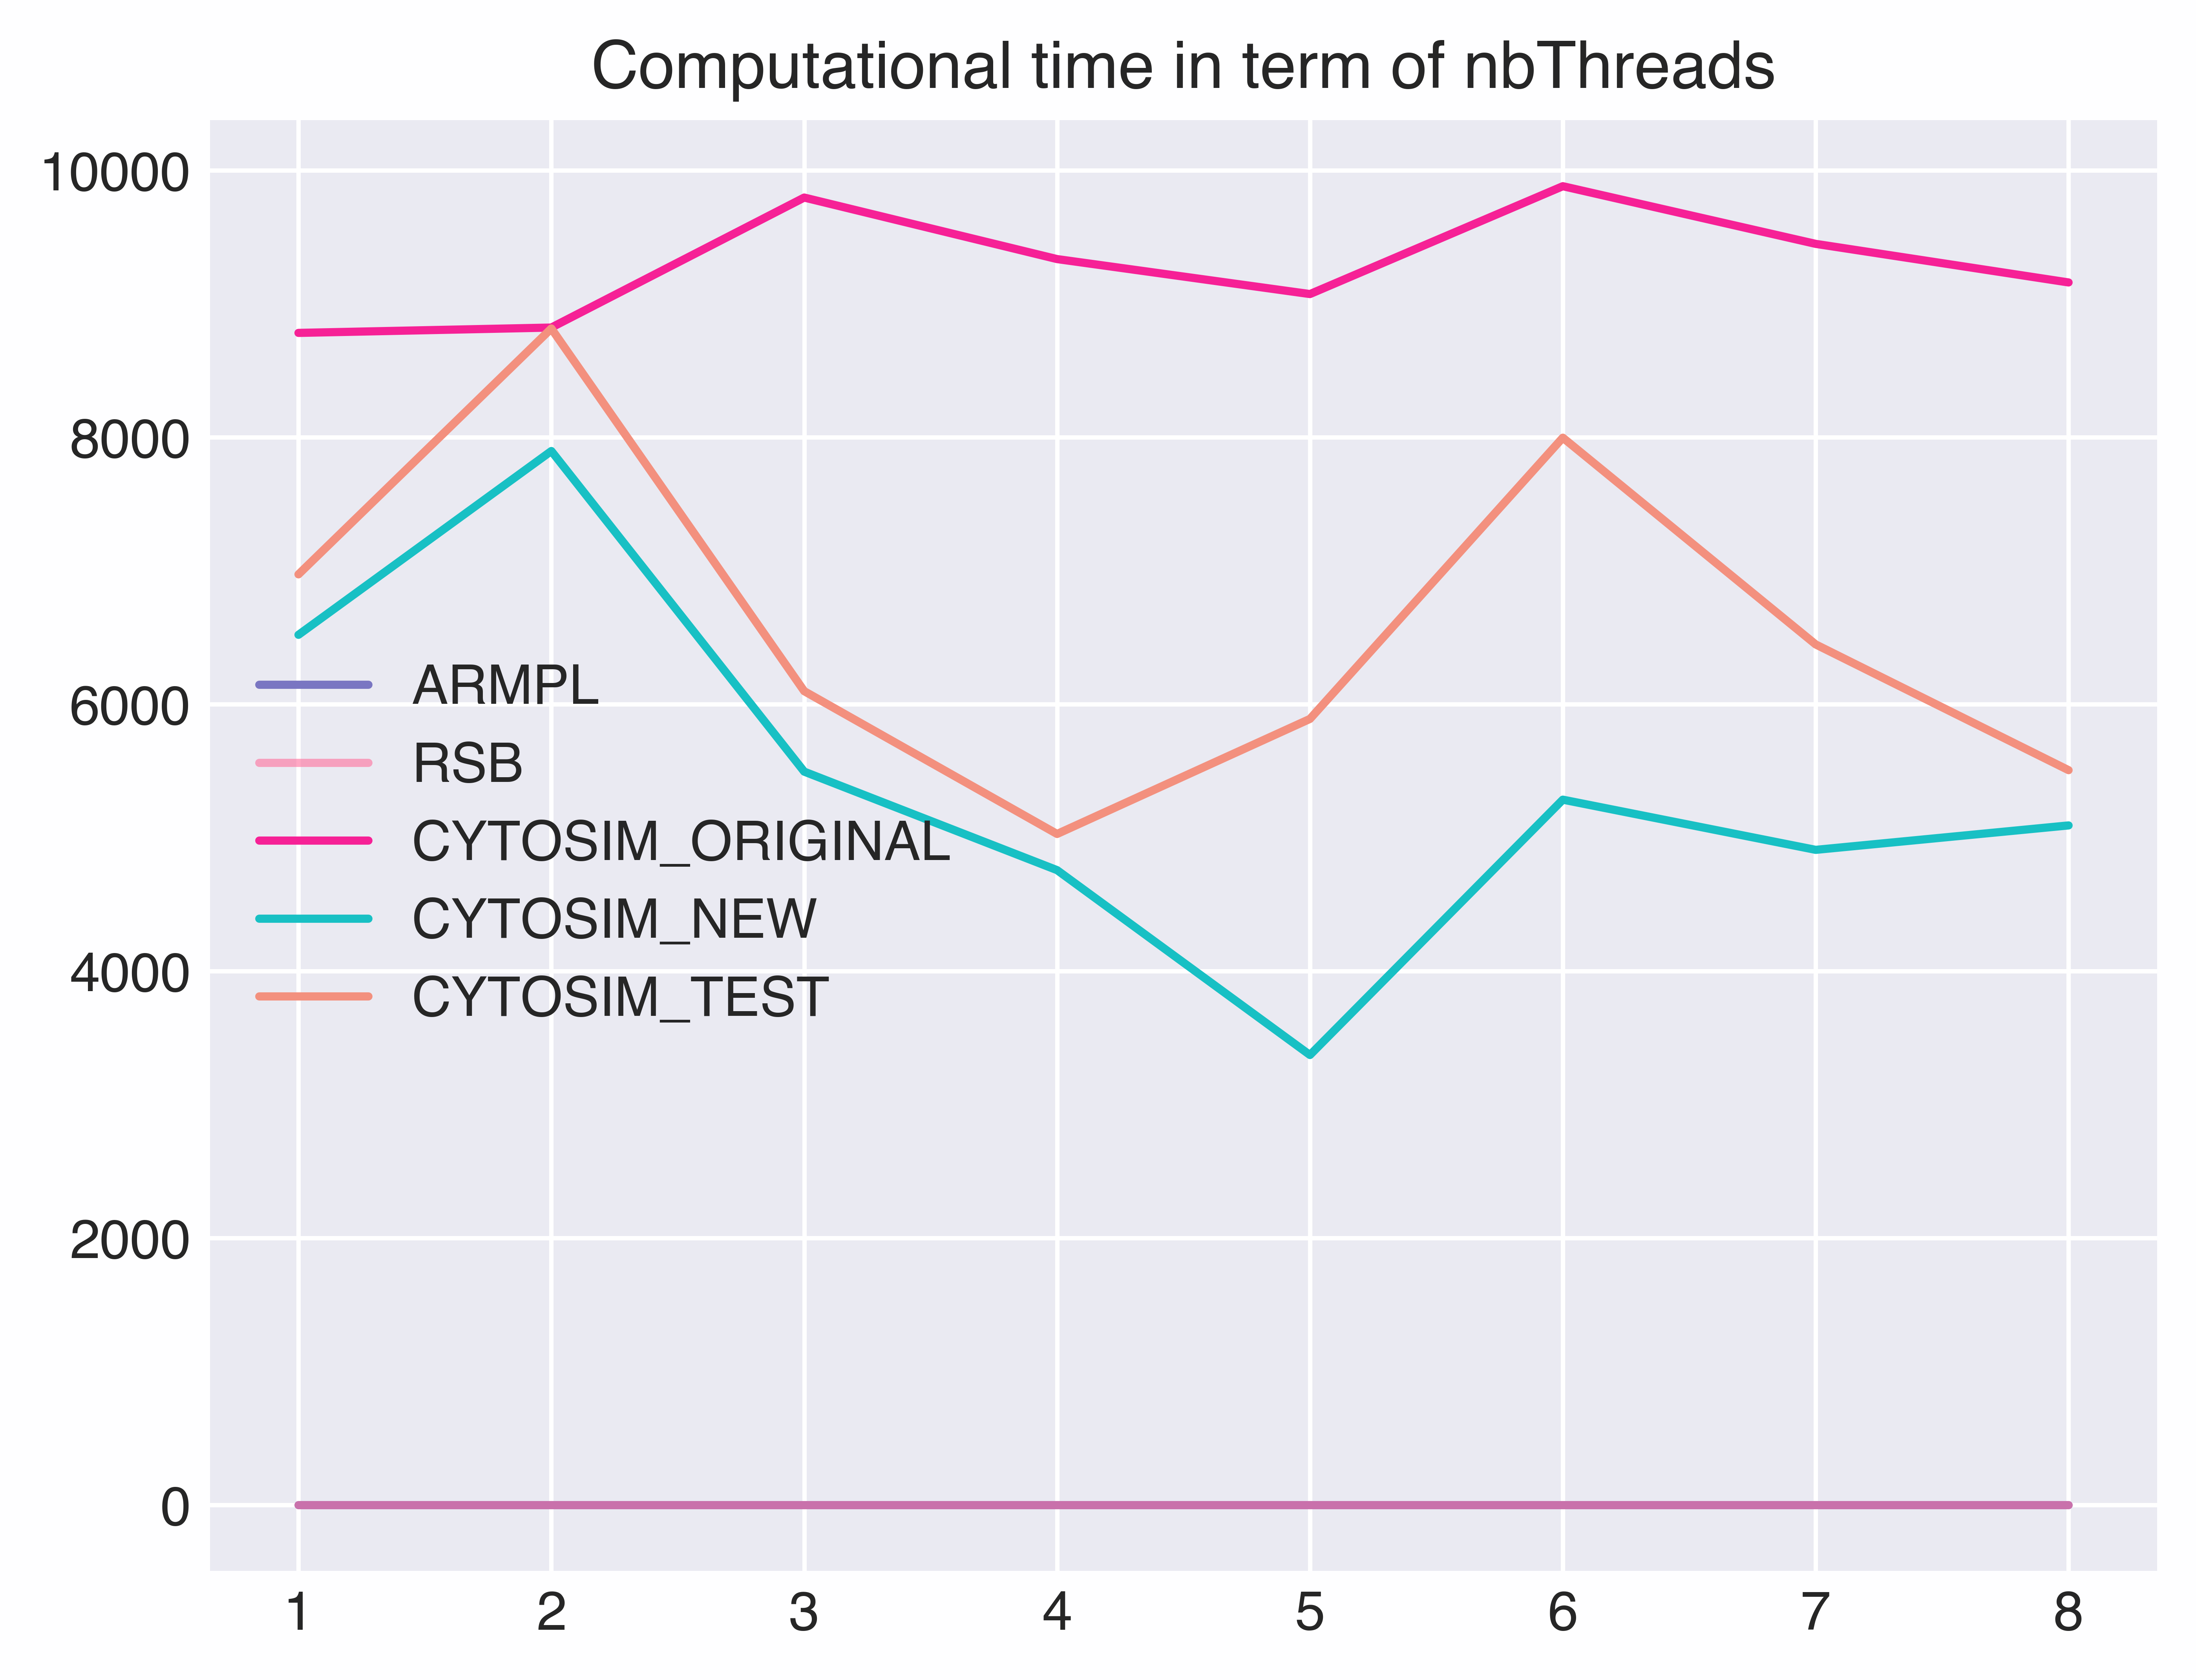

In [182]:

tests = TestInstance(0,1,8,8)
tests.runTests()
tests.createGraph()

In [ ]:
CHOICE = 3
MAX_VALUE = 1
START_VALUE = 0.1
NB_TESTS = 100